# Python Data Science Toolbox (Part 2)

In [ ]:
# DATA "World Development Indicators"
# https://www.kaggle.com/worldbank/world-development-indicators

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../datasets/tweets.csv")
world_bank = pd.read_csv("../datasets/world_bank.csv")
world_bank.head(3)


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,92495902.0,31.285384
1,Caribbean small states,CSS,1960,4190810.0,31.597490
2,Central Europe and the Baltics,CEB,1960,91401583.0,44.507921


## 1. Using iterators in PythonLand

### Introduction to iterators

In [1]:
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

for element in flash:
    print("**", element)

# Create an iterator 
superhero = iter(flash)

print(next(superhero))
print(next(superhero))
print(next(superhero))
print(next(superhero))

** jay garrick
** barry allen
** wally west
** bart allen
jay garrick
barry allen
wally west
bart allen


In [6]:
small_value = iter(range(3))
print("-",next(small_value))
print("-",next(small_value))
print("-",next(small_value))

for num in range(3):
    print(num)

googol = iter(range(10 ** 100))
print("**",next(googol))
print("**",next(googol))
print("**",next(googol))
print("**",next(googol))
print("**",next(googol))

- 0
- 1
- 2
0
1
2
** 0
** 1
** 2
** 3
** 4


In [13]:
word = 'Data'
it = iter(word)
print(*it)

D a t a


In [14]:
pythonistas = {'hugo': 'bowne-anderson', 'francis': 'castro'}
for key, value in pythonistas.items():    
    print(key, value)

hugo bowne-anderson
francis castro


### Playing with iterators

In [11]:
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pryde']

aliases = ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers = ['telepathy',
             'thermokinesis',
             'teleportation',
             'magnetokinesis',
             'intangibility']


mutant_list = list(enumerate(mutants))
print(mutant_list)

for index1,value1 in enumerate(mutants):
    print(">",index1, value1)

for index2,value2 in enumerate(mutants,start=1):
    print(index2, value2)


[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
> 0 charles xavier
> 1 bobby drake
> 2 kurt wagner
> 3 max eisenhardt
> 4 kitty pryde
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


In [12]:
mutant_data = list(zip(mutants,aliases,powers))
print(mutant_data)
mutant_zip = zip(mutants,aliases,powers)
print(mutant_zip)
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]
charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


In [15]:
z1 = zip(mutants,powers)
print(*z1)
z1 = zip(mutants,powers)
result1, result2 = zip(*z1)
print(result1 == mutants)
print(result2 == powers)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')
False
False


### Using iterators to load large files into memory

In [5]:
def count_entries(csv_file,c_size,colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""

    counts_dict = {}
    for chunk in pd.read_csv(csv_file,chunksize=c_size):
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1
    return counts_dict

result_counts = count_entries('../datasets/tweets.csv',10,'lang')
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


### Congratulations!

## 2. List comprehensions and generators

In [ ]:
## CLASE ESPECIAL PARA REDUCIR LINEAS DE CODIGO ****************
##
# COMPRENSIONES

### List comprehensions

In [9]:
# ANTES
nums = [12, 8, 21, 3, 16]
new_nums = []
for num in nums:    
    new_nums.append(num + 1)
print("ANTES ----")
print(new_nums,'\n')

# DESPUES
nums = [12, 8, 21, 3, 16]
new_nums = [num + 1 for num in nums]
print("DESPUES ----")
print(new_nums)

ANTES ----
[13, 9, 22, 4, 17] 

DESPUES ----
[13, 9, 22, 4, 17]


In [10]:
squares = [i**2 for i in range(0, 10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [11]:
matrix = [[col for col in range(0,5)] for row in range(0,5)]
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


### Advanced comprehensions

[ _output expression **for** iterator variable **in** iterable **if** predicate expression_ ]

In [12]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

new_fellowship = [member for member in fellowship if len(member)>=7]
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [13]:
[num ** 2 if num % 2 == 0 else 0 for num in range(10)]

[0, 0, 4, 0, 16, 0, 36, 0, 64, 0]

In [14]:
new_fellowship = [member if len(member)>=7 else '' for member in fellowship  ]
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


In [15]:
new_fellowship = {member: len(member) for member in fellowship}
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}




### Introduction to generator expressions


In [16]:
##
# GENERADORES
# Es como un lista de comprension pero no almacena la lista en la memoria

[num ** 2 for num in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [17]:
(num ** 2 for num in range(10))

<generator object <genexpr> at 0x0000015F38A4F5F0>

In [20]:
result = (num for num in range(0,11))

print("-", next(result))
print("-", next(result))

for value in result:
    print(value)


- 0
- 1
2
3
4
5
6
7
8
9
10


In [21]:
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

lengths = (len(person) for person in  lannister)
for value in lengths:
    print(value)

6
5
5
6
7


In [22]:
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

def get_lengths(input_list):
    """Generator function that yields the
    length of the strings in input_list."""
    for person in input_list:
        yield len(person)

for value in get_lengths(lannister):
    print(value)

6
5
5
6
7


### Wrapping up comprehensions and generators

<img src="https://i.ibb.co/2ZYVN0z/Screenshot-51.png" alt="Screenshot-51" border="0">

In [23]:
tweet_time = df['created_at']

tweet_clock_time = [entry[11:19] for entry  in tweet_time]
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

In [24]:
tweet_time = df['created_at']

tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


## 3. Bringing it all together!

### Welcome to the case study!

In [31]:
# world_bank

In [36]:
feature_names = ['CountryName','CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']

In [37]:
row_vals = ['Arab World','ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT',
 '1960','133.56090740552298']

In [38]:
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""
    zipped_lists = zip(list1, list2)
    rs_dict = dict(zipped_lists)
    return rs_dict

rs_fxn = lists2dict(feature_names,row_vals)
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [40]:
row_lists = [['Arab World',
  'ARB',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)',
  'SP.ADO.TFRT',
  '1960',
  '133.56090740552298'],
 ['Arab World',
  'ARB',
  'Age dependency ratio (% of working-age population)',
  'SP.POP.DPND',
  '1960',
  '87.7976011532547'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, old (% of working-age population)',
  'SP.POP.DPND.OL',
  '1960',
  '6.634579191565161'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, young (% of working-age population)',
  'SP.POP.DPND.YG',
  '1960',
  '81.02332950839141']]

In [43]:
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]
print(list_of_dicts[0])
print(list_of_dicts[1])
# print(list_of_dicts) # ARRAY DE DICCIONARIOS

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}


In [44]:
df = pd.DataFrame(list_of_dicts)
df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.56090740552298
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.7976011532547
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579191565161
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.02332950839141


### Using Python generators for streaming data


In [50]:
with open('../datasets/world_bank.csv') as file:

    file.readline()
    counts_dict = {}

    for j in range(0, 10):
        line = file.readline().split(',')
        first_col = line[0]
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)

{'Arab World': 1, 'Caribbean small states': 1, 'Central Europe and the Baltics': 1, 'East Asia & Pacific (all income levels)': 1, 'East Asia & Pacific (developing only)': 1, 'Euro area': 1, 'Europe & Central Asia (all income levels)': 1, 'Europe & Central Asia (developing only)': 1, 'European Union': 1, 'Fragile and conflict affected situations': 1}


In [51]:
def read_large_file(file_object):
    """A generator function to read a large file lazily."""
    while True:
        data = file_object.readline()
        if not data:
            break
        yield data
        
with open('../datasets/world_bank.csv') as file:
    gen_file = read_large_file(file)
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



In [53]:
counts_dict = {}

with open('../datasets/world_bank.csv') as file:
    for line in read_large_file(file):
        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1
    
# print(counts_dict)

### Using pandas' read_csv iterator for streaming data

In [56]:
df_reader = pd.read_csv('../datasets/world_bank.csv', chunksize=8)
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
5      2.653965e+08                      62.096947  
6      6.674890e+08               

In [58]:
world_bank.head(5)

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [68]:
urb_pop_reader = pd.read_csv('../datasets/world_bank.csv', chunksize=1000)

df_urb_pop = next(urb_pop_reader)
# df_urb_pop.head()
df_pop_ceb = df_urb_pop[ df_urb_pop['CountryCode'] == 'CEB']

pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)
print(pops_list)

[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


<ipython-input-76-8c8498435ecd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


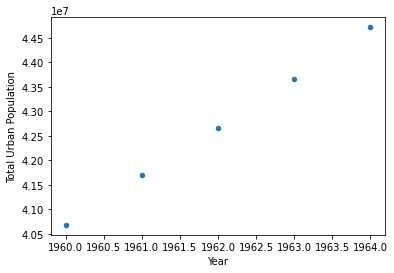

In [76]:
urb_pop_reader = pd.read_csv('../datasets/world_bank.csv', chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

<ipython-input-77-2e9faf2174c6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


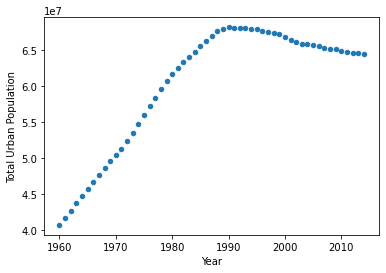

In [77]:
urb_pop_reader = pd.read_csv('../datasets/world_bank.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

<ipython-input-78-d7b666efa629>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


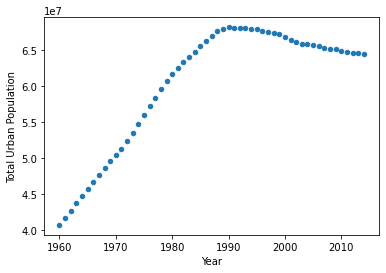

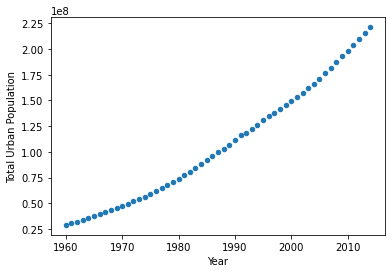

In [78]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop('../datasets/world_bank.csv','CEB')

# Call plot_pop for country code 'ARB'
plot_pop('../datasets/world_bank.csv','ARB')


### Final thoughts